In [18]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import xlrd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
train_df = pd.read_csv('../re/Mindfulness Practices across  (Responses) - Form responses 1.csv')

In [20]:
train_df.head()

,Profession,Field of work,Age Group,Do you practice any form of mindfulness or meditation?,Do you practice any physical exercises?,Do you have any ongoing physical or mental health issues?,How long have you been practicing mindfulness?,How long are your meditation sessions per day?,How regularly do you meditate?,How would you rate your regular stress level?,Do you face trouble sleeping?,Have you ever tried to manage your sleep issues by meditation?,"Do you find yourself anxious about any situation (examinations, public speaking, or such)?",Have you ever tried to manage your anxiety by meditation?,Have you ever considered mindfulness for spiritual or paranormal purposes?
0,Student,Engineering,18-30,No,"Yes, sometimes","Maybe, it is undiagnosed",>1 year and <5 year,10-20 minutes,1-2 times a week,6,Rarely,No,"Yes, very much","Yes, did not find it effective",No
1,Student,Engineering,18-30,No,"Yes, regularly",No,< 1 month,None,None,2,"Yes, regularly (2-3 days a week)","Yes, did not find it effective",No,"Yes, did not find it effective",Yes
2,Student,Engineering,18-30,"Used to, but stopped","No, but I used to","Maybe, it is undiagnosed",None,None,None,4,Never,No,No,No,No
3,Student,Engineering,18-30,No,"Yes, sometimes","Yes, I have a diagnosed health problem and I a...",None,None,None,8,Rarely,No,"Sometimes, for big events and such",No,No
4,Student,Engineering,18-30,No,"Yes, regularly",No,None,None,None,8,"Yes, very frequently (>3 days a week)",No,"Yes, very much",No,No


In [21]:
print(train_df.columns.values)

['Profession' 'Field of work' 'Age Group'
 'Do you practice any form of mindfulness or meditation?'
 'Do you practice any physical exercises?'
 'Do you have any ongoing physical or mental health issues?'
 'How long have you been practicing mindfulness?'
 'How long are your meditation sessions per day?'
 'How regularly do you meditate?'
 'How would you rate your regular stress level?'
 'Do you face trouble sleeping?'
 'Have you ever tried to manage your sleep issues by meditation?'
 'Do you find yourself anxious about any situation (examinations, public speaking, or such)?'
 'Have you ever tried to manage your anxiety by meditation?'
 'Have you ever considered mindfulness for spiritual or paranormal purposes?']


In [22]:
dict = {
    'Profession': 'Profession',
    'Field of work':'FieldOfWork',
    'Age Group':'AgeGroup',
     'Do you practice any form of mindfulness or meditation?':'practice',
     'Do you practice any physical exercises?':'exercise',
 'What form of exercise do you practice?':'exercise_form',
 'Do you have any ongoing physical or mental health issues?':'health_issues',
 'What is your diagnosis?' 'What form of mindfulness do you practice?':'mindfulness_form',
 'How long have you been practicing mindfulness?':'practice_time',
 'How long are your meditation sessions per day?':'meditation_time',
 'How regularly do you meditate?':'meditation_frequency',
 'How did you start meditating?':'meditation_start',
 'How would you rate your regular stress level?':'stress_level',
 'Do you face trouble sleeping?':'sleep_trouble',
 'Have you ever tried to manage your sleep issues by meditation?':'sleep_trouble_meditation',
 'Do you find yourself anxious about any situation (examinations, public speaking, or such)?':'anxious_situation',
 'Have you ever tried to manage your anxiety by meditation?':'anxious_situation_meditation',
 'Have you ever considered mindfulness for spiritual or paranormal purposes?':'spiritual_purpose',
 'What form of mindfulness do you practice for this?':'spiritual_purpose_form',
 'How effective have you found the practice?':'spiritual_purpose_effectiveness',
 'How did you start your practice?': 'spiritual_purpose_start',
  'How long do you meditate?':'spiritual_purpose_meditation_time',
}

In [23]:
train_df.rename(columns=dict, inplace=True)

In [24]:
train_df.head()

,Profession,FieldOfWork,AgeGroup,practice,exercise,health_issues,practice_time,meditation_time,meditation_frequency,stress_level,sleep_trouble,sleep_trouble_meditation,anxious_situation,anxious_situation_meditation,spiritual_purpose
0,Student,Engineering,18-30,No,"Yes, sometimes","Maybe, it is undiagnosed",>1 year and <5 year,10-20 minutes,1-2 times a week,6,Rarely,No,"Yes, very much","Yes, did not find it effective",No
1,Student,Engineering,18-30,No,"Yes, regularly",No,< 1 month,None,None,2,"Yes, regularly (2-3 days a week)","Yes, did not find it effective",No,"Yes, did not find it effective",Yes
2,Student,Engineering,18-30,"Used to, but stopped","No, but I used to","Maybe, it is undiagnosed",None,None,None,4,Never,No,No,No,No
3,Student,Engineering,18-30,No,"Yes, sometimes","Yes, I have a diagnosed health problem and I a...",None,None,None,8,Rarely,No,"Sometimes, for big events and such",No,No
4,Student,Engineering,18-30,No,"Yes, regularly",No,None,None,None,8,"Yes, very frequently (>3 days a week)",No,"Yes, very much",No,No


In [25]:
def lam(x, dic):
    try:
        return dic[x]
    except:
        return 999
def encoding(data, col, dic):
    print(col, dic)
    data[col] = data[col].apply(lambda x: lam(x, dic))
    return data
def mapping(data, col):
    lis = data[col].unique()
    ans={}
    for i in range(len(lis)):
        ans[lis[i]] = i
    return encoding(data, col, ans)
   

In [26]:
for i in train_df.columns:
    train_df = mapping(train_df, i)

Profession {'Student': 0, 'Working': 1, 'Homemaker': 2, 'Medical practitioner': 3}
FieldOfWork {'Engineering': 0, 'Management - Senior level': 1, 'Teaching': 2, 'Management - Junior level': 3, 'Research': 4, 'Medicine': 5, 'Homemaking': 6, 'Service': 7, 'Fashion Designer ': 8}
AgeGroup {'18-30': 0, '50-65': 1, '30-50': 2}
practice {'No': 0, 'Used to, but stopped': 1, 'Yes': 2}
exercise {'Yes, sometimes': 0, 'Yes, regularly': 1, 'No, but I used to': 2, 'No, I never have': 3}
health_issues {'Maybe, it is undiagnosed': 0, 'No': 1, 'Yes, I have a diagnosed health problem and I am on medication for it': 2, 'Yes, I have a diagnosed health problem but medication is not applicable': 3, "Yes, I have but I don't care.": 4}
practice_time {'>1 year and <5 year': 0, '< 1 month': 1, 'None': 2, 'Around a year': 3, 'Few months': 4, '> 5 years': 5}
meditation_time {'10-20 minutes': 0, 'None': 1, '5-10 minutes': 2, '20 minutes - 1 hours': 3, '> 1 hours': 4}
meditation_frequency {'1-2 times a week': 0, '

In [27]:
train_df.head()

,Profession,FieldOfWork,AgeGroup,practice,exercise,health_issues,practice_time,meditation_time,meditation_frequency,stress_level,sleep_trouble,sleep_trouble_meditation,anxious_situation,anxious_situation_meditation,spiritual_purpose
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1
2,0,0,0,1,2,0,2,1,1,2,2,0,1,1,0
3,0,0,0,0,0,2,2,1,1,3,0,0,2,1,0
4,0,0,0,0,1,1,2,1,1,3,3,0,0,1,0


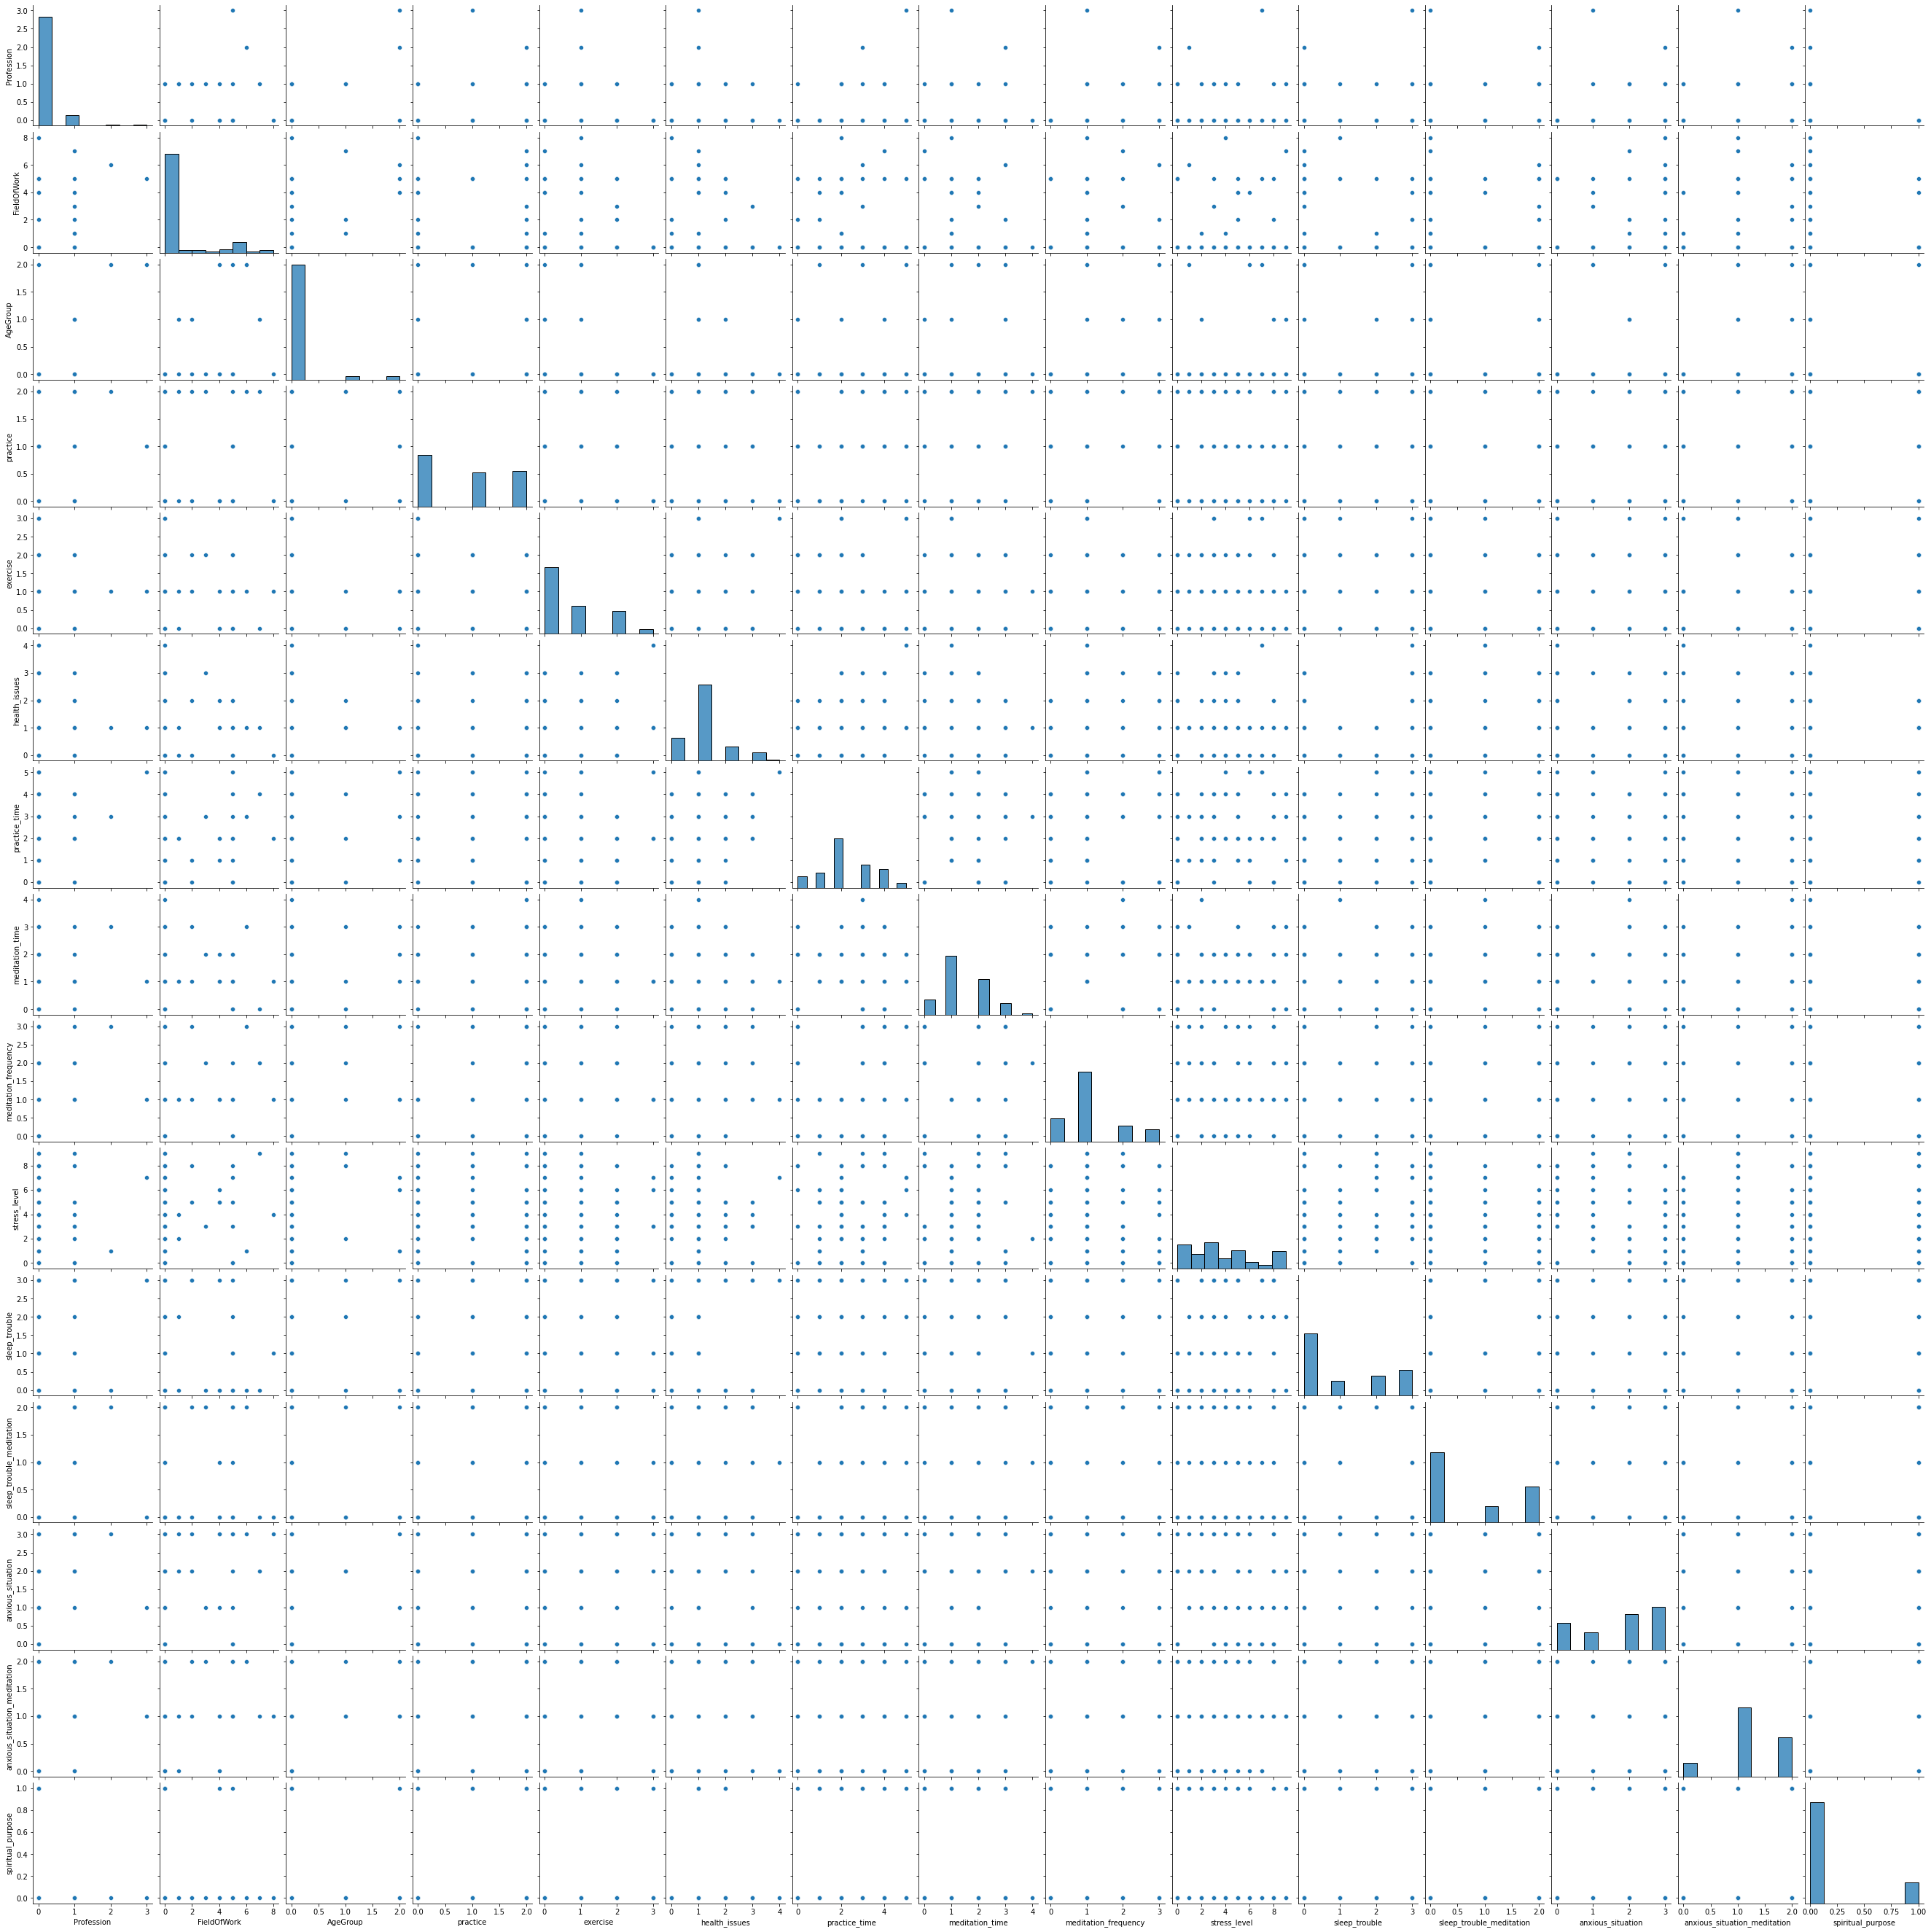

In [28]:
# visualize
sns.pairplot(train_df)

<AxesSubplot:>

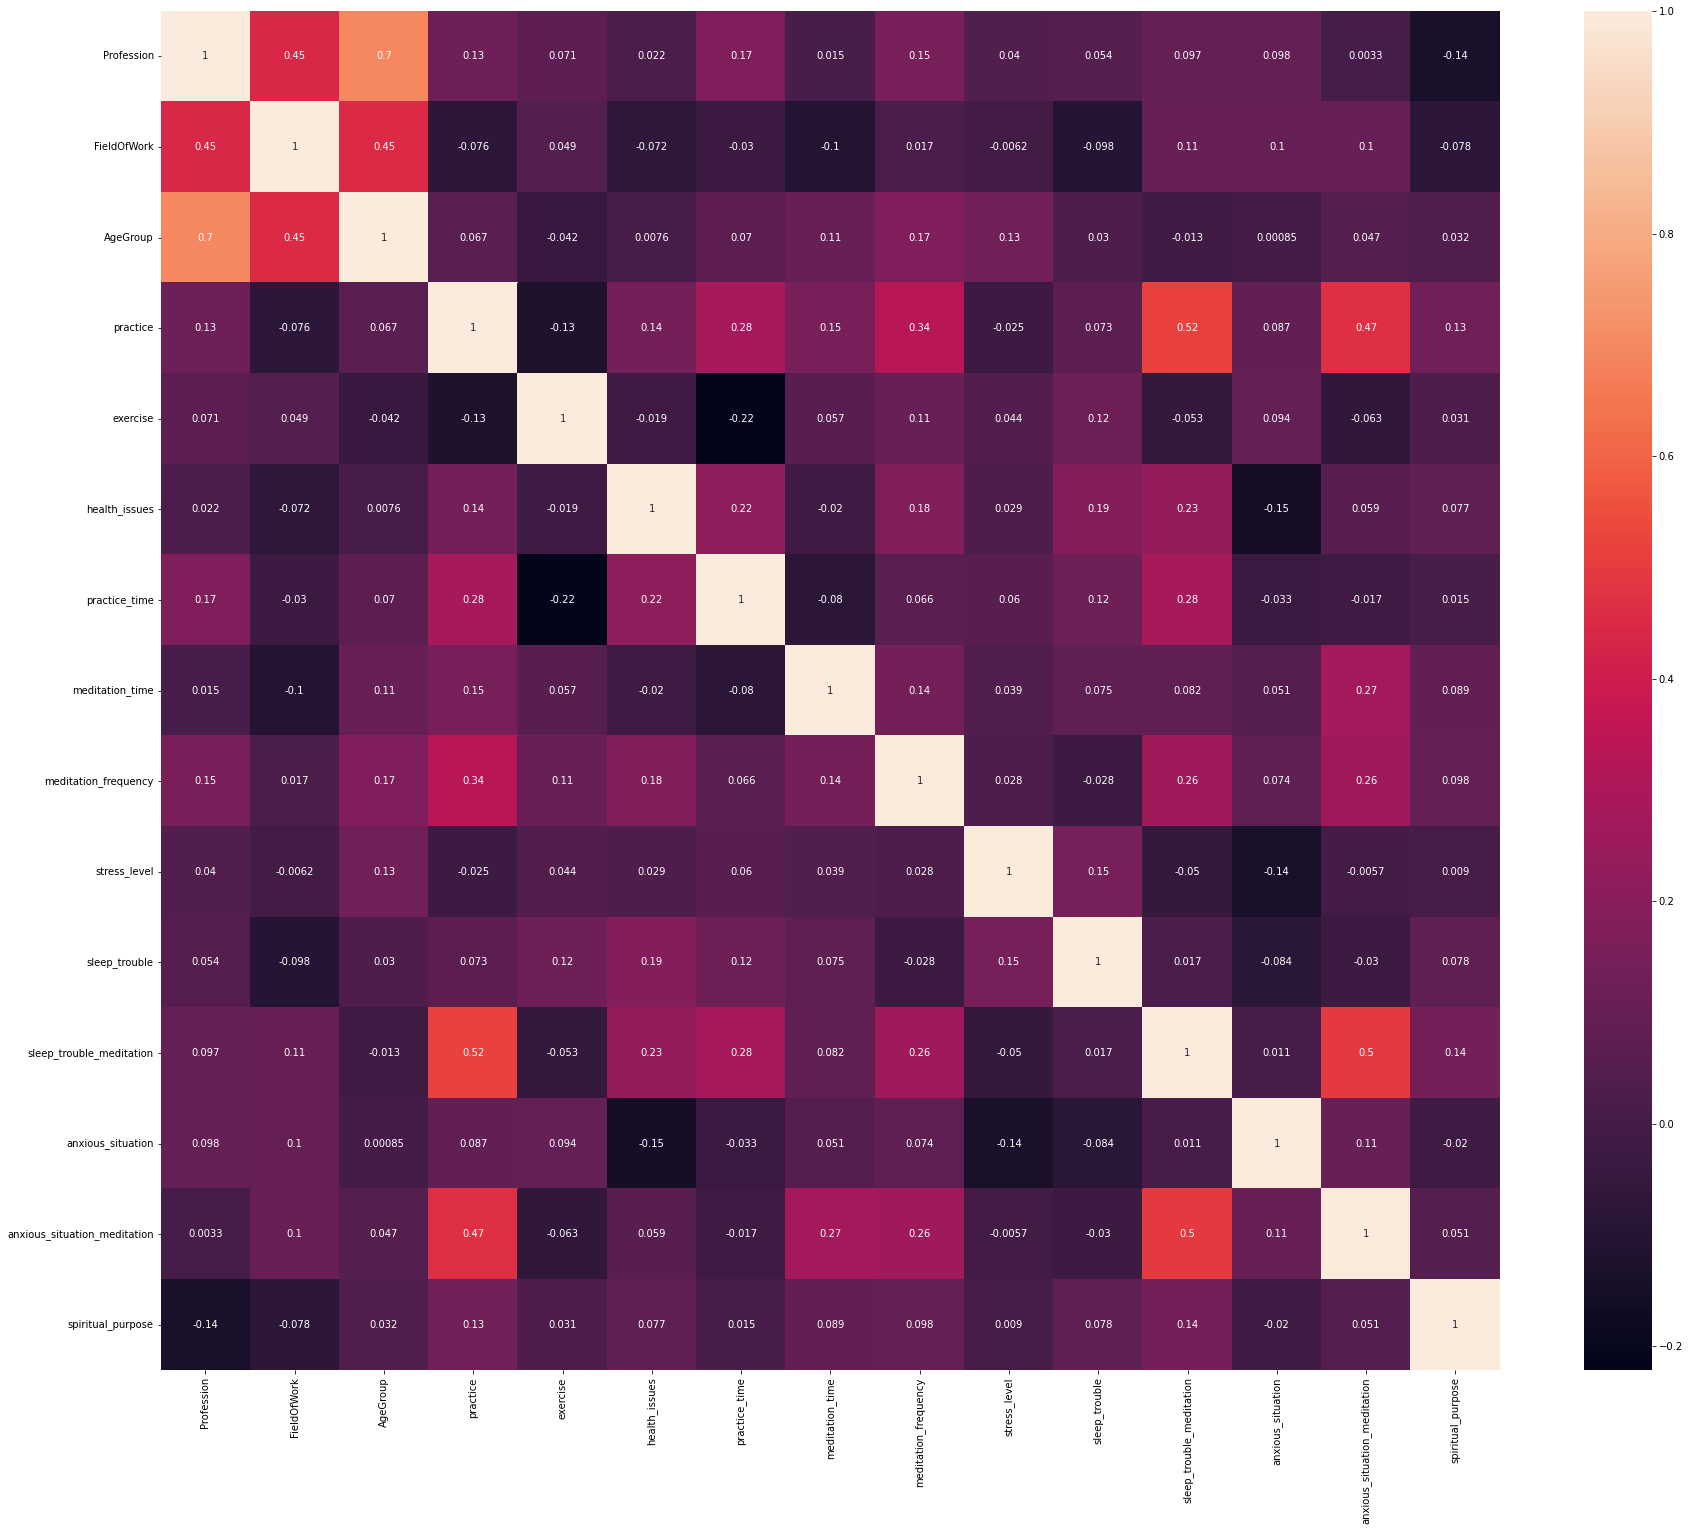

In [29]:
# Creating the correaltion matrix
corr = train_df.corr()
# Plotting the correlation matrix on a heatmap
fig, ax = plt.subplots(figsize=(30,25))
sns.heatmap(corr, annot=True)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
# plt.show()

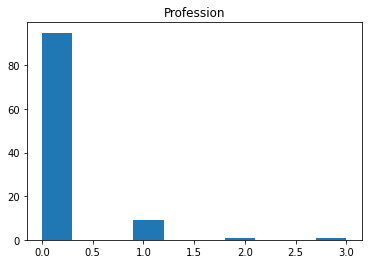

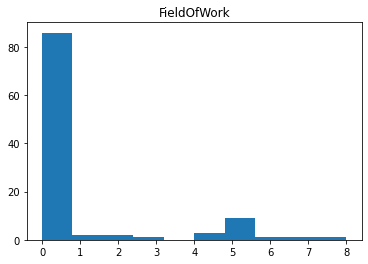

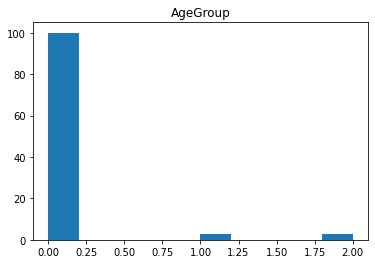

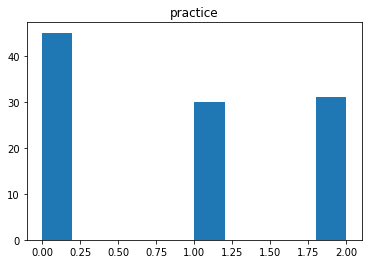

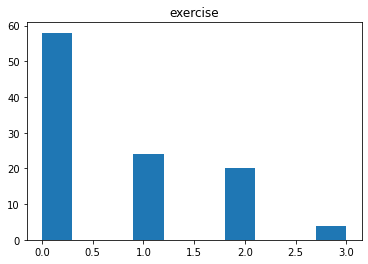

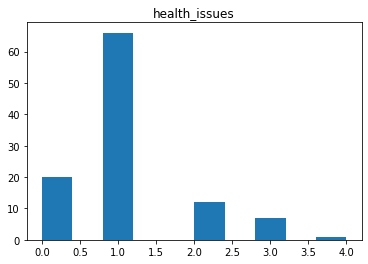

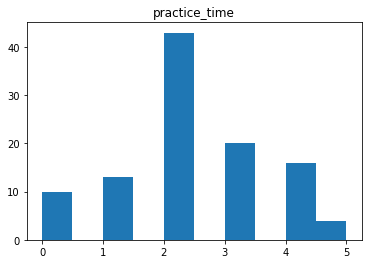

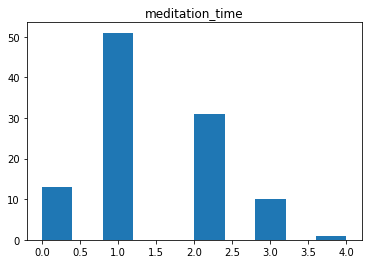

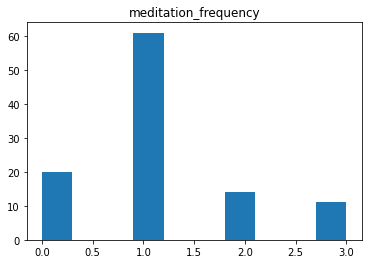

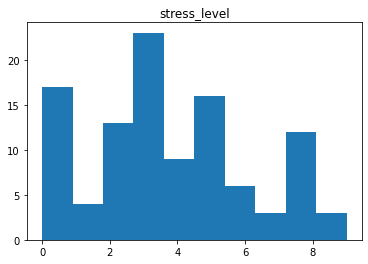

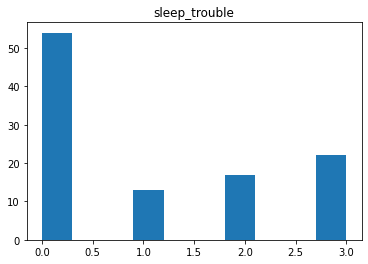

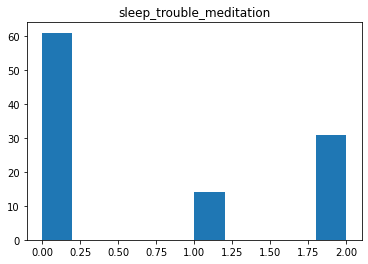

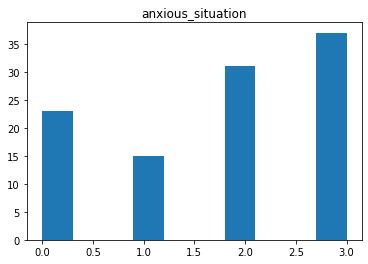

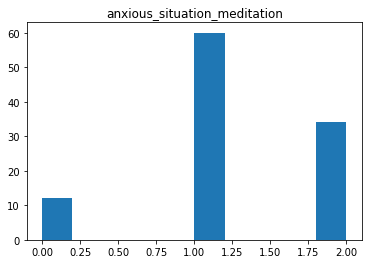

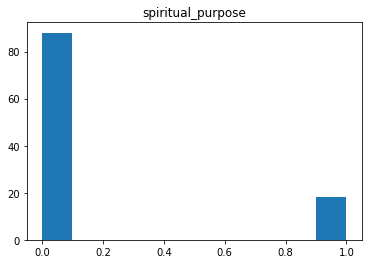

In [30]:
for i in train_df.columns:
    plt.hist(train_df[i])
    plt.title(i)
    plt.show()

In [31]:
train_df.describe()


,Profession,FieldOfWork,AgeGroup,practice,exercise,health_issues,practice_time,meditation_time,meditation_frequency,stress_level,sleep_trouble,sleep_trouble_meditation,anxious_situation,anxious_situation_meditation,spiritual_purpose
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,0.132075,0.820755,0.084906,0.867925,0.716981,1.084906,2.292453,1.386792,1.150943,3.726415,1.066038,0.716981,1.773585,1.207547,0.169811
std,0.438080,1.876152,0.368211,0.840357,0.902428,0.806142,1.249510,0.857135,0.848443,2.598655,1.228773,0.891812,1.148772,0.628179,0.377251
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,3.000000,2.000000,1.000000,5.000000,2.000000,2.000000,3.000000,2.000000,0.000000
max,3.000000,8.000000,2.000000,2.000000,3.000000,4.000000,5.000000,4.000000,3.000000,9.000000,3.000000,2.000000,3.000000,2.000000,1.000000
